In [1]:
from synthetic_generator import generator, shadow_image_generator, noise_image_generator
import sys
sys.path.append("..")
from OrthoSAM import orthosam
from utility import setup, load_config
import os

In [2]:
config = load_config()

In [3]:
# generate B&W synthetic images
Dir=os.path.join(config['DataDIR'],'synthetic','synthetic_01_3000_bw')
generator(Dir=Dir, min_radi=1, max_radi=3000
          , image_size=10000, num_circles=5000, max_attempts=100
          , overlap=False, ran_color=False, generate_dem=True
          )

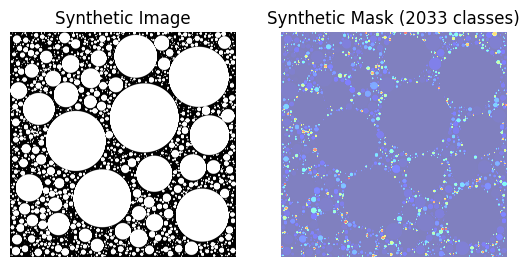

2034

In [6]:
import matplotlib.pyplot as plt
import os
import numpy as np
plt.subplot(1, 2, 1)
plt.imshow(np.load(os.path.join(Dir, 'img.npy')))
plt.title('Synthetic Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np.load(os.path.join(Dir, 'msk.npy')), alpha=0.5, cmap='jet')
plt.title(f'Synthetic Mask ({len(np.unique(np.load(os.path.join(Dir, "msk.npy")))) - 1} classes)')
plt.axis('off')
plt.show()
len(np.unique(np.load(os.path.join(Dir, 'msk.npy'))))

In [ ]:
# generate colored synthetic images
Dir=os.path.join(config['DataDIR'],'synthetic','synthetic_01_3000_cl')
generator(Dir=Dir, min_radi=1, max_radi=3000
          , image_size=10000, num_circles=5000, max_attempts=100
          , overlap=False, ran_color=True, generate_dem=True
          )

# generate synthetic images with noise with existing baseline image
baseline_Dir=os.path.join(config['DataDIR'],'synthetic','synthetic_01_3000_cl')
Dir=os.path.join(config['DataDIR'],'synthetic','synthetic_01_3000_cl_noise_192')
noise_image_generator(baseline_Dir=baseline_Dir, Dir=Dir, min_radi=1, max_radi=3000
                      , image_size=10000, num_circles=5000, max_attempts=100
                      , overlap=False, ran_color=True, generate_dem=True
                      , std=192)

In [ ]:
# generate synthetic images with shadows without existing baseline image
Dir='data/synthetic/synthetic_01_3000_cl_shadow_0_45'
shadow_image_generator(Dir=Dir, min_radi=1, max_radi=3000
                       , image_size=10000, num_circles=5000, max_attempts=100
                       , overlap=False, ran_color=True, generate_dem=True
                       , azimuth=0, inclination=45)

In [ ]:
#segmentation
main_para={'OutDIR': os.path.join(config['BaseDIR'],'output','synthetic_01_3000_cl_shadow_0_45'),# where output will be stored
        'DatasetName': 'synthetic/synthetic_01_3000_cl_shadow_0_45',
        'fid': 'img.npy',#Filename or the index after sorting by file name.
        'resolution(mm)': 1,#image resolution in mm/pixel
        'tile_size': 1024,
        'tile_overlap':200,
        'resample_factor': 1,#'Auto': auto select resample rate.
        'input_point_per_axis': 30,
        'dilation_size':5,
        'stability_t':0.85,
        'expected_min_size(sqmm)': 500,
        'min_radius': 0,
        'Discord_notification': True,# True: send discord when finished.
        'Plotting': True# True: plot the results
        }
#specify for individual layers. e.g. different point_per_side
passes_para_list=[
    {'resample_factor':0.5, #'Auto': auto select resample rate.
        }
    ]
#parameters for preprocessing. If no preprocessing is needed, leave empty or remove it.
pre_para_list=[{#'Gaussian': {'kernel size':3},
                #'CLAHE':{'clip limit':2},
                #'Downsample': {'fxy':4},
                #'Buffering': {'crop size': crop_size}
            },{},{}]

#If no preprocessing is needed, remove pre_para_list or use None.
passes_para_list=setup(main_para, passes_para_list, pre_para_list)

orthosam(passes_para_list)

In [ ]:
#assessment of synthetic images
from synthetic_assessment import accuracy
segmentation_output_Dir=os.path.join(config['BaseDIR'],'output','synthetic_01_3000_cl_shadow_0_45')
accuracy(Dir=segmentation_output_Dir, shadow=True)